# Here we create some models from the initial batch of features

## First we read in the data

In [1]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
from statsmodels.tools import add_constant
from itertools import combinations
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

from sklearn.model_selection import train_test_split
import random

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.lda import LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb


In [100]:
print(xgb.__version__)
print(sklearn.__version__)


1.3.3
0.22.1


In [82]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [2]:
import sklearn

In [10]:
text_data = pd.read_csv("FinalFeaturesCleaned_Apr10.csv")
text_data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,html_file,source,research,filename,url,Text,lang_langdetect_multi,...,question_mark,exclamation_point,structure_count,format_count,context_count,pronoun_count,has_edu_suffix,formality,has_meta_title,has_meta_abstract
0,0,0,0,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,BSDFSDJFOL4CPAW7YUQL24UMHLZ43INO,https://www.cretalive.gr/kriti/protaseis-gia-p...,Προτάσεις για το πρόβλημα απορρόφησης των παρα...,el,...,0.000000,0.004854,0,0,0,0,0,0.846686,1.0,1.0
1,1,1,1,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VA2DFA5VRG5W7CNVRJQKTRLPWQ6KLQHM,https://journeymagazineptbo.com/category/uncat...,Uncategorized – JOURNEY Magazine JOURNEY Magaz...,en,...,0.012559,0.001570,0,1,0,2,0,0.802178,1.0,0.0
2,2,2,2,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,C764E7NTYBVCAYDGXJ3DLO3RXA3PU4HC,http://www.mylotanswers.com/w/keywords/6/autho...,myLot Discussions - authors - 6 sign in • sign...,en,...,0.017725,0.002954,9,1,2,13,0,0.642857,0.0,0.0
3,3,3,3,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,VEYJ6UFXF3CDVLVZBJOVZHGEIVN2DKN7,http://aaaspaceart.blog.dada.net/post/12069431...,* HOW DO YOU LIKE MY PROFILE PAGE ?? - AAASP...,en,...,0.011547,0.050808,0,0,0,18,0,0.821918,0.0,0.0
4,4,4,4,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,GWB,0,HLLWVPVBNE2BVXWMEHJKDHQXCZJSISGT,http://mastersallen.co.uk/about/,About - Masters Allen Skip to the content Work...,en,...,0.000000,0.000000,3,0,4,4,0,0.682879,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19828,19829,19829,9941,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,254e46c9565a5ae0c184a5916c2b8653d8a7282b,https://phcfm.org/index.php/phcfm/article/view...,Adherence of doctors to a clinical guideline f...,en,...,0.000205,0.000000,59,39,95,3,0,0.833848,0.0,0.0
19829,19830,19830,9942,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,1db515afdb16a4b05975b9beb046067488c2d71d,https://www.mdpi.com/1422-0067/21/8/2754/htm,IJMS Free Full-Text Heterologous Expressio...,en,...,0.000265,0.000000,84,220,102,8,0,0.871613,1.0,1.0
19830,19831,19831,9943,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,6d4c15abca8a1b51164b9f6f8b0880f76259f704,https://jhs.um.ac.ir/index.php/jhorts/article/...,بررسی اثر ترینگزاپک اتیل بر افزایش مقاومت به ت...,en,...,0.000000,0.000000,1,15,2,1,1,0.955801,0.0,0.0
19831,19832,19832,9944,/sfs/lustre/bahamut/scratch/ml8vp/internet_arc...,FATCAT,1,c28e5bfc97bd8226b18d31d8580272e17fc83af8,https://www.mdpi.com/1422-0067/21/20/7479/htm,IJMS Free Full-Text Modulation of Actin Fi...,en,...,0.000219,0.000000,92,178,78,5,0,0.851350,1.0,1.0


In [11]:
# text_data_withtags = pd.read_csv("GWBFATCAT_with_initial_features_Mar28.csv")
# text_data_withtags = text_data_withtags[["filename", "has_meta_title","has_meta_abstract","has_meta_doi","has_meta_number","has_meta_container_issn" ,"has_meta_isbn","has_meta_publisher"]]
# text_data_withtags

In [12]:
# text_data_merged = text_data.merge(text_data_withtags, left_on='filename', right_on='filename')

In [13]:
# text_data_merged

In [14]:
text_data.drop(columns=['Unnamed: 0', "Unnamed: 0.1", "Unnamed: 0.1.1", 'html_file', 'source', 'filename','url', 'Text', 'lang_langdetect_multi'], inplace=True)


In [15]:
text_data

,research,word_count,question_mark,exclamation_point,structure_count,format_count,context_count,pronoun_count,has_edu_suffix,formality,has_meta_title,has_meta_abstract
0,0,-0.654805,0.000000,0.004854,0,0,0,0,0,0.846686,1.0,1.0
1,0,-0.650713,0.012559,0.001570,0,1,0,2,0,0.802178,1.0,0.0
2,0,-0.642096,0.017725,0.002954,9,1,2,13,0,0.642857,0.0,0.0
3,0,-0.694655,0.011547,0.050808,0,0,0,18,0,0.821918,0.0,0.0
4,0,-0.670315,0.000000,0.000000,3,0,4,4,0,0.682879,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19828,1,0.260668,0.000205,0.000000,59,39,95,3,0,0.833848,0.0,0.0
19829,1,1.646586,0.000265,0.000000,84,220,102,8,0,0.871613,1.0,1.0
19830,1,-0.362069,0.000000,0.000000,1,15,2,1,1,0.955801,0.0,0.0
19831,1,1.180664,0.000219,0.000000,92,178,78,5,0,0.851350,1.0,1.0


## Split into Test/Train

In [16]:
random.seed(42)
train, test = train_test_split(text_data, test_size=0.2)

In [17]:
train[['research', 'word_count']].groupby(['research']).agg(['count'])

,word_count
,count
research,
0,7888
1,7978


In [18]:
test[['research', 'word_count']].groupby(['research']).agg(['count'])

,word_count
,count
research,
0,1990
1,1977


## Check for correlations

In [20]:
# variables = ['word_count', 'question_mark', 'exclamation_point', 
#              'structure_count', 'format_count', 'context_count'] 
             #"has_edu_suffix","has_meta_title","has_meta_abstract","has_meta_doi","has_meta_number","has_meta_container_issn","has_meta_isbn","has_meta_publisher"]
train_corr = train#[variables]


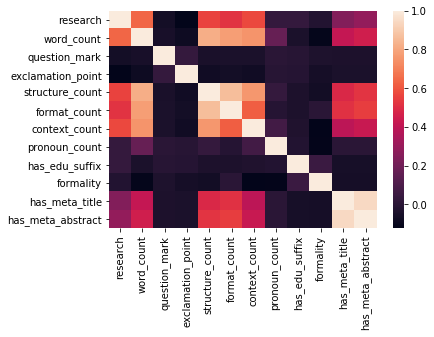

In [21]:
sns.heatmap(train.corr())

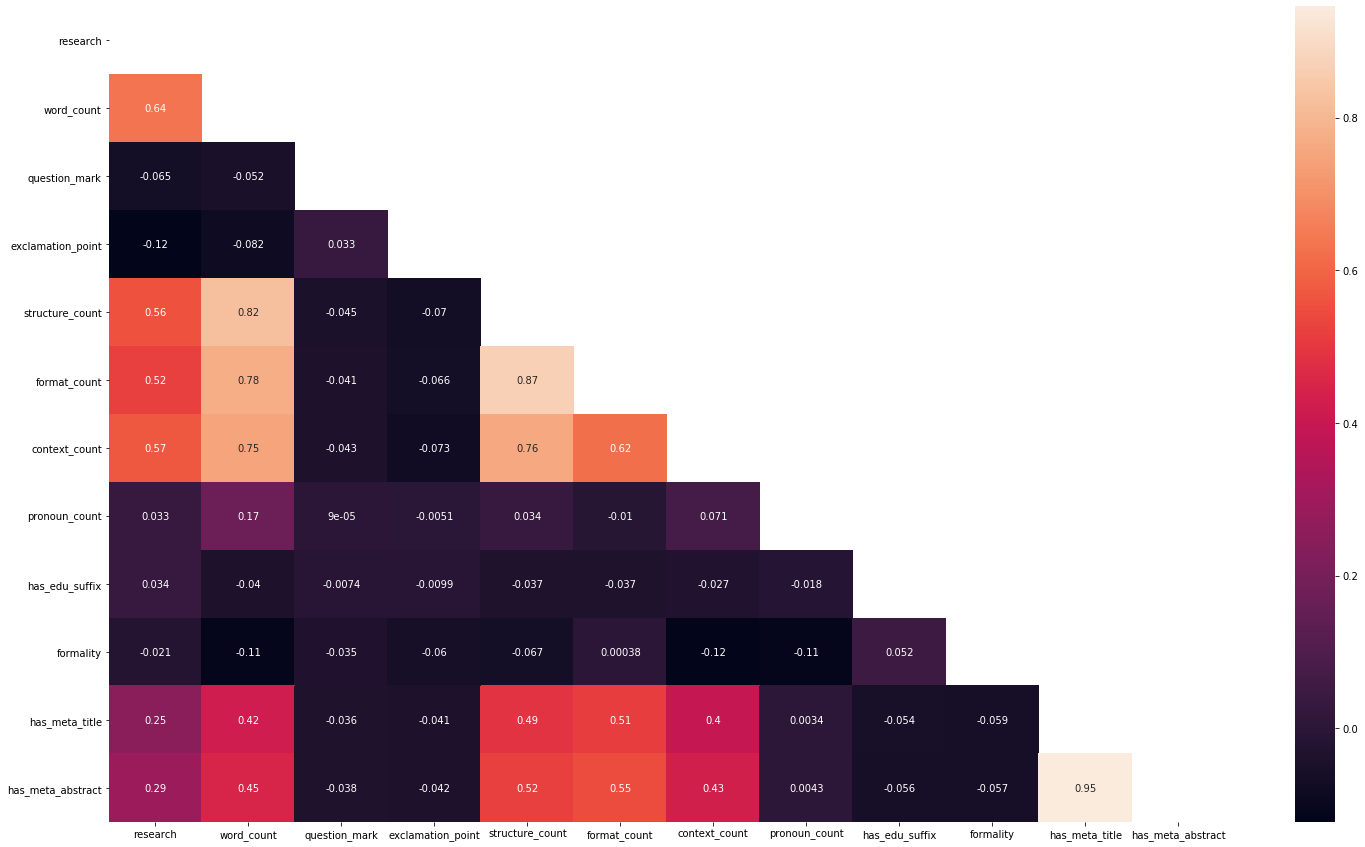

In [22]:
matrix = np.triu(train.corr())
plt.figure(figsize=(25, 15))
sns.heatmap(train.corr(), annot=True, mask=matrix)

## Explore the Data (can probably copy over the language code here as well)

In [23]:
text_data.describe()

,research,word_count,question_mark,exclamation_point,structure_count,format_count,context_count,pronoun_count,has_edu_suffix,formality,has_meta_title,has_meta_abstract
count,19833.000000,1.983300e+04,19833.000000,19833.000000,19833.000000,19833.000000,19833.000000,19833.000000,19833.000000,19833.000000,19833.000000,19833.000000
mean,0.501941,-7.450580e-16,0.002437,0.002287,32.103666,53.581556,29.371149,11.348762,0.012908,0.845156,0.394645,0.370796
std,0.500009,1.000025e+00,0.023898,0.017009,54.938136,100.790957,49.152047,42.384229,0.112880,0.071654,0.488787,0.483030
min,0.000000,-7.877105e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.159805e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.820705,0.000000,0.000000
50%,1.000000,-4.796807e-01,0.000318,0.000000,5.000000,4.000000,5.000000,2.000000,0.000000,0.846686,0.000000,0.000000
75%,1.000000,5.848530e-01,0.001682,0.000163,41.000000,62.000000,46.000000,9.000000,0.000000,0.879235,1.000000,1.000000
max,1.000000,2.362742e+01,2.285192,2.000000,1104.000000,1380.000000,1079.000000,1866.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
text_data.groupby('research').mean()

,word_count,question_mark,exclamation_point,structure_count,format_count,context_count,pronoun_count,has_edu_suffix,formality,has_meta_title,has_meta_abstract
research,,,,,,,,,,,
0,-0.63214,0.003968,0.004529,1.758959,1.261693,1.962239,9.957380,0.008706,0.846686,0.274145,0.230816
1,0.62725,0.000917,0.000062,62.213661,105.496735,56.568056,12.729382,0.017077,0.843639,0.514214,0.509694


## Now we start to model

In [83]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
variables = ['word_count', 'question_mark', 'exclamation_point',
       'structure_count', 'format_count', 'context_count', 'pronoun_count',
       'has_edu_suffix', 'formality', 'has_meta_title', 'has_meta_abstract'] 
model.fit(train[variables], train['research'])
model.score(test[variables],test["research"])
y_pred = model.predict(test[variables])
values = getValues(test["research"], y_pred)
values

scores = cross_val_score(model, test[variables],test["research"], cv=10)
scores

/home/jrm4ag/.local/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:16:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jrm4ag/.local/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:16:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:16:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:16:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:16:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

array([0.98740554, 0.98488665, 0.98488665, 0.97229219, 0.98992443,
       0.97481108, 0.97481108, 0.97474747, 0.97222222, 0.97222222])

In [27]:
def getValues(y_test , y_pred):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    TN = cnf_matrix[0][0]
    FN = cnf_matrix[1][0]
    TP = cnf_matrix[1][1]
    FP = cnf_matrix[0][1]
    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)
    FPR = FP/(TP+FP)
    FNR = FN/(TP+FN)
    accuracy = accuracy_score(y_test, y_pred)
    recall = sklearn.metrics.recall_score(y_test, y_pred)
    precision = sklearn.metrics.precision_score(y_test, y_pred)
    f1_score = sklearn.metrics.f1_score(y_test, y_pred)
    return {"accuracy":accuracy, "recall":recall, 'precision':precision, "f1_score":f1_score, "FPR":FPR, "FNR":FNR}

In [87]:
def getModels(train, test, variables):
#     df_model = pd.DataFrame(columns = ["Algorithm", "Accuracy", "Recall", "Precision"], index = [1,2,3,4,5])
    df_model = pd.DataFrame({"Accuracy":[0,0,0,0,0,0,0,0], "Recall":[0,0,0,0,0,0,0,0], "Precision":[0,0,0,0,0,0,0,0], "F1 Score":[0,0,0,0,0,0,0,0], "FP Rate":[0,0,0,0,0,0,0,0], "FN Rate":[0,0,0,0,0,0,0,0]}, index =['Logistic Regression', 'LDA', 'QDA', 'Random Forest', 'Naive Bayes', 'SVM', "KNN", "XGBoost"])
    y_train = train['research']
    X_train = train[variables]
    y_test = test['research']
    X_test = test[variables]
    #logistic Regression
    logreg = LogisticRegression(solver='lbfgs', max_iter=400)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    values = getValues(y_test, y_pred)
    df_model.loc["Logistic Regression","Accuracy"] = round(values['accuracy'], 3)*100
    df_model.loc["Logistic Regression","Recall"] = round(values['recall'], 3)*100
    df_model.loc["Logistic Regression","Precision"] = round(values['precision'], 3)*100
    df_model.loc["Logistic Regression","F1 Score"] = round(values['f1_score'], 3)*100
    df_model.loc["Logistic Regression","FP Rate"] = round(values['FPR'],3)*100
    df_model.loc["Logistic Regression","FN Rate"] = round(values['FNR'], 3)*100
        #logistic Regression
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    y_pred = lda.predict(X_test)
    values = getValues(y_test, y_pred)
    df_model.loc["LDA","Accuracy"] = round(values['accuracy'], 3)*100
    df_model.loc["LDA","Recall"] = round(values['recall'], 3)*100
    df_model.loc["LDA","Precision"] = round(values['precision'], 3)*100
    df_model.loc["LDA","F1 Score"] = round(values['f1_score'], 3)*100
    df_model.loc["LDA","FP Rate"] = round(values['FPR'], 3)*100
    df_model.loc["LDA","FN Rate"] = round(values['FNR'], 3)*100
        #logistic Regression
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    y_pred = qda.predict(X_test)
    values = getValues(y_test, y_pred)
    df_model.loc["QDA","Accuracy"] = round(values['accuracy'], 3)*100
    df_model.loc["QDA","Recall"] = round(values['recall'], 3)*100
    df_model.loc["QDA","Precision"] = round(values['precision'], 3)*100
    df_model.loc["QDA","F1 Score"] = round(values['f1_score'], 3)*100
    df_model.loc["QDA","FP Rate"] = round(values['FPR'], 3)*100
    df_model.loc["QDA","FN Rate"] = round(values['FNR'], 3)*100
    # Random Forest
    randFor = RandomForestClassifier(max_depth=2, random_state=0)
    randFor.fit(X_train, y_train)
    y_pred = randFor.predict(X_test)
    values = getValues(y_test, y_pred)
    df_model.loc["Random Forest","Accuracy"] = round(values['accuracy'], 3)*100
    df_model.loc["Random Forest","Recall"] = round(values['recall'], 3)*100
    df_model.loc["Random Forest","Precision"] = round(values['precision'], 3)*100
    df_model.loc["Random Forest","F1 Score"] = round(values['f1_score'], 3)*100
    df_model.loc["Random Forest","FP Rate"] =round(values['FPR'], 3)*100
    df_model.loc["Random Forest","FN Rate"] = round(values['FNR'], 3)*100
    # Naive Bayes
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    values = getValues(y_test, y_pred)
    df_model.loc["Naive Bayes","Accuracy"] = round(values['accuracy'], 4)*100
    df_model.loc["Naive Bayes","Recall"] = round(values['recall'], 4)*100
    df_model.loc["Naive Bayes","Precision"] = round(values['precision'], 4)*100
    df_model.loc["Naive Bayes","F1 Score"] = round(values['f1_score'], 4)*100
    df_model.loc["Naive Bayes","FP Rate"] = round(values['FPR'], 4)*100
    df_model.loc["Naive Bayes","FN Rate"] = round(values['FNR'], 4)*100
    # SVM
    supportVM = svm.SVC()
    supportVM.fit(X_train, y_train)
    y_pred = supportVM.predict(X_test)
    values = getValues(y_test, y_pred)
    df_model.loc["SVM","Accuracy"] = round(values['accuracy'],4)*100
    df_model.loc["SVM","Recall"] = round(values['recall'], 4)*100
    df_model.loc["SVM","Precision"] = round(values['precision'], 4)*100
    df_model.loc["SVM","F1 Score"] = round(values['f1_score'],4)*100
    df_model.loc["SVM","FP Rate"] = round(values['FPR'], 4)*100
    df_model.loc["SVM","FN Rate"] = round(values['FNR'], 4)*100
    # KNN
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    values = getValues(y_test, y_pred)
    df_model.loc["KNN","Accuracy"] = round(values['accuracy'], 4)*100
    df_model.loc["KNN","Recall"] = round(values['recall'], 4)*100
    df_model.loc["KNN","Precision"] = round(values['precision'], 4)*100
    df_model.loc["KNN","F1 Score"] = round(values['f1_score'], 4)*100
    df_model.loc["KNN","FP Rate"] = round(values['FPR'], 4)*100
    df_model.loc["KNN","FN Rate"] = round(values['FNR'], 4)*100
    # XGBoost
    model=xgb.XGBClassifier(random_state=1,learning_rate=0.01,use_label_encoder=False)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    values = getValues(y_test, y_pred)
    df_model.loc["XGBoost","Accuracy"] = round(values['accuracy'], 4)*100
    df_model.loc["XGBoost","Recall"] = round(values['recall'], 4)*100
    df_model.loc["XGBoost","Precision"] = round(values['precision'], 4)*100
    df_model.loc["XGBoost","F1 Score"] = round(values['f1_score'], 4)*100
    df_model.loc["XGBoost","FP Rate"] = round(values['FPR'], 4)*100
    df_model.loc["XGBoost","FN Rate"] = round(values['FNR'], 4)*100
    return df_model

In [88]:
train.columns

Index(['research', 'word_count', 'question_mark', 'exclamation_point',
       'structure_count', 'format_count', 'context_count', 'pronoun_count',
       'has_edu_suffix', 'formality', 'has_meta_title', 'has_meta_abstract'],
      dtype='object')

In [89]:
# All of the features
variables = ['word_count', 'question_mark', 'exclamation_point',
       'structure_count', 'format_count', 'context_count', 'pronoun_count',
       'has_edu_suffix', 'formality', 'has_meta_title', 'has_meta_abstract'] 
getModels(train, test, variables)

[22:53:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Recall,Precision,F1 Score,FP Rate,FN Rate
Logistic Regression,94.40,91.60,97.10,94.20,2.90,8.40
LDA,83.20,68.60,96.70,80.30,3.30,31.40
QDA,84.60,97.20,77.60,86.30,22.40,2.80
Random Forest,95.70,94.90,96.40,95.70,3.60,5.10
Naive Bayes,87.50,78.20,95.97,86.18,4.03,21.80
SVM,94.08,91.70,96.23,93.91,3.77,8.30
KNN,95.64,95.85,95.42,95.63,4.58,4.15
XGBoost,98.26,98.48,98.04,98.26,1.96,1.52


In [90]:
# BMA recommended feature
# All of the features
variables = ['word_count', 'question_mark', 'exclamation_point',
       'structure_count', 'format_count', 'context_count', 'pronoun_count',
       'has_edu_suffix', 'formality', 'has_meta_title'] 
getModels(train, test, variables)

[22:53:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Recall,Precision,F1 Score,FP Rate,FN Rate
Logistic Regression,94.40,91.50,97.00,94.20,3.00,8.50
LDA,83.00,68.20,96.80,80.00,3.20,31.80
QDA,93.80,96.30,91.70,93.90,8.30,3.70
Random Forest,95.80,94.70,96.80,95.80,3.20,5.30
Naive Bayes,87.87,78.76,96.23,86.62,3.77,21.24
SVM,94.03,91.65,96.18,93.86,3.82,8.35
KNN,95.59,95.75,95.41,95.58,4.59,4.25
XGBoost,98.21,98.53,97.89,98.21,2.11,1.47


In [91]:
# contextual features only
variables = ['structure_count', 'format_count', 'context_count'] 
getModels(train, test, variables)

[22:53:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Recall,Precision,F1 Score,FP Rate,FN Rate
Logistic Regression,93.40,89.70,96.80,93.10,3.20,10.30
LDA,78.40,57.30,98.90,72.50,1.10,42.70
QDA,84.00,70.00,97.20,81.40,2.80,30.00
Random Forest,94.80,93.80,95.60,94.70,4.40,6.20
Naive Bayes,84.62,70.86,97.63,82.12,2.37,29.14
SVM,94.13,92.11,95.94,93.99,4.06,7.89
KNN,94.58,94.44,94.68,94.56,5.32,5.56
XGBoost,95.08,94.59,95.51,95.04,4.49,5.41


In [92]:
# structural features only
variables = ['word_count', 'has_edu_suffix', 'has_meta_title', 'has_meta_abstract'] 
getModels(train, test, variables)

[22:53:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Recall,Precision,F1 Score,FP Rate,FN Rate
Logistic Regression,87.30,79.80,93.90,86.30,6.10,20.20
LDA,82.80,68.70,95.40,79.90,4.60,31.30
QDA,85.80,77.00,93.40,84.40,6.60,23.00
Random Forest,89.00,87.50,90.20,88.80,9.80,12.50
Naive Bayes,80.51,67.27,91.35,77.48,8.65,32.73
SVM,89.44,87.20,91.22,89.16,8.78,12.80
KNN,88.03,87.51,88.36,87.93,11.64,12.49
XGBoost,89.24,86.49,91.44,88.90,8.56,13.51


In [93]:
# stylistic features only

In [94]:
variables = ['question_mark', 'exclamation_point','pronoun_count',
       'formality'] 
getModels(train, test, variables)

[22:53:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Recall,Precision,F1 Score,FP Rate,FN Rate
Logistic Regression,70.30,86.40,65.20,74.30,34.80,13.60
LDA,69.70,86.60,64.60,74.00,35.40,13.40
QDA,72.00,98.00,64.40,77.70,35.60,2.00
Random Forest,84.20,84.50,83.90,84.20,16.10,15.50
Naive Bayes,66.50,98.99,59.92,74.65,40.08,1.01
SVM,55.43,43.85,56.85,49.51,43.15,56.15
KNN,82.76,85.28,81.10,83.14,18.90,14.72
XGBoost,91.23,89.63,92.53,91.06,7.47,10.37


In [95]:
variables = ['word_count', 'question_mark', 'exclamation_point'] 
getModels(train, test, variables)

[22:53:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Recall,Precision,F1 Score,FP Rate,FN Rate
Logistic Regression,86.30,77.70,93.60,84.90,6.40,22.30
LDA,82.80,67.90,96.70,79.80,3.30,32.10
QDA,71.60,98.50,63.90,77.50,36.10,1.50
Random Forest,91.30,87.50,94.60,90.90,5.40,12.50
Naive Bayes,71.69,98.43,64.06,77.61,35.94,1.57
SVM,88.66,84.98,91.65,88.19,8.35,15.02
KNN,92.26,94.64,90.30,92.42,9.70,5.36
XGBoost,94.66,95.09,94.24,94.66,5.76,4.91


In [96]:
variables = ['word_count'] 
getModels(train, test, variables)

[22:53:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Recall,Precision,F1 Score,FP Rate,FN Rate
Logistic Regression,86.20,77.70,93.50,84.90,6.50,22.30
LDA,82.50,67.20,96.60,79.30,3.40,32.80
QDA,82.50,67.30,96.60,79.30,3.40,32.70
Random Forest,89.10,87.50,90.30,88.80,9.70,12.50
Naive Bayes,82.51,67.27,96.59,79.31,3.41,32.73
SVM,88.51,84.57,91.72,88.00,8.28,15.43
KNN,87.42,86.09,88.37,87.21,11.63,13.91
XGBoost,89.21,87.91,90.19,89.04,9.81,12.09


In [97]:
variables = ['question_mark', 'exclamation_point'] 
getModels(train, test, variables)

[22:53:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Recall,Precision,F1 Score,FP Rate,FN Rate
Logistic Regression,67.00,99.20,60.30,75.00,39.70,0.80
LDA,65.50,99.40,59.10,74.20,40.90,0.60
QDA,71.30,98.30,63.70,77.30,36.30,1.70
Random Forest,84.20,84.50,83.90,84.20,16.10,15.50
Naive Bayes,71.29,98.33,63.74,77.34,36.26,1.67
SVM,71.57,98.28,63.98,77.50,36.02,1.72
KNN,85.68,79.56,90.56,84.71,9.44,20.44
XGBoost,87.27,83.51,90.22,86.73,9.78,16.49


In [98]:
variables = ['structure_count', 'format_count', 'context_count'] 
getModels(train, test, variables)

[22:53:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Recall,Precision,F1 Score,FP Rate,FN Rate
Logistic Regression,93.40,89.70,96.80,93.10,3.20,10.30
LDA,78.40,57.30,98.90,72.50,1.10,42.70
QDA,84.00,70.00,97.20,81.40,2.80,30.00
Random Forest,94.80,93.80,95.60,94.70,4.40,6.20
Naive Bayes,84.62,70.86,97.63,82.12,2.37,29.14
SVM,94.13,92.11,95.94,93.99,4.06,7.89
KNN,94.58,94.44,94.68,94.56,5.32,5.56
XGBoost,95.08,94.59,95.51,95.04,4.49,5.41
